In [1]:
!pip install -q pandas matplotlib kagglehub

In [2]:
import kagglehub

path = kagglehub.dataset_download("alfarisbachmid/dirty-financial-transactions-dataset")
print("Dataset downloaded to:", path)

Using Colab cache for faster access to the 'dirty-financial-transactions-dataset' dataset.
Dataset downloaded to: /kaggle/input/dirty-financial-transactions-dataset


## **Step 1: Data Cleaning and Preprocessing**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

financial = pd.read_csv(path + '/dirty_financial_transactions.csv')
financial.head()

,Transaction_ID,Transaction_Date,Customer_ID,Product_Name,Quantity,Price,Payment_Method,Transaction_Status
0,T0001,2024-08-02,C2205,Headphones,-5.0,$420.21,pay pal,NaN
1,T0002,2020-02-10,C3156,Coffee,469.0,-445.34202525395585,creditcard,Pending
2,T0003,2025-02-30,C2919,Tablet,-4.0,810.9930123946459,credit card,completed
3,T0004,2020-08-17,C3009,Tab,-7.0,868.6083413217348,PayPal,Pending
4,T0005,2025-02-30,C3488,Coffee Machine,-10.0,-763.1224490039416,PayPal,completed


In [4]:
financial.tail()

,Transaction_ID,Transaction_Date,Customer_ID,Product_Name,Quantity,Price,Payment_Method,Transaction_Status
99995,NaN,2021-10-06,C1743,Headphones,-8.0,240.0032380562687,PayPal,complete
99996,T99997,2024-08-25,C4830,Smartphone,NaN,503.82951729633896,credit card,Completed
99997,T99998,2023-13-01,C280,Laptop,-10.0,NaN,PayPal,completed
99998,T99999,2020-07-12,C4059,Headphones,10.0,NaN,PayPal,Completed
99999,T100000,2023-10-04,C1805,Tablet,2.0,89.37402345793535,PayPal,Failed


In [5]:
financial.shape

(100000, 8)

In [6]:
financial.rename(columns={'Transaction_ID': 'Transaction ID',
                      'Transaction_Date': 'Transaction Date',
                      'Customer_ID': 'Customer ID',
                      'Product_Name': 'Product Name',
                      'Payment_Method': 'Payment Method',
                      'Transaction_Status': 'Transaction Status'},
                 inplace=True)

In [7]:
financial.columns

Index(['Transaction ID', 'Transaction Date', 'Customer ID', 'Product Name',
       'Quantity', 'Price', 'Payment Method', 'Transaction Status'],
      dtype='object')

In [8]:
financial['Customer ID'] = financial['Customer ID'].fillna('Unknown')

In [9]:
def clean_product(p):
    p = p.lower()
    p = ''.join(ch for ch in p if ch.isalpha())

    if 'tablet' in p or p.startswith(('ta','t','tab','tabl')):
        return 'Tablet'
    if 'laptop' in p or p.startswith(('l','la','lap','lapt')):
        return 'Laptop'
    if 'coffee' in p:
        return 'Coffee Machine'
    if 'c' in p:
        return 'Coffee Machine'
    if 'cof' in p:
        return 'Coffee Machine'
    if 'co' in p:
        return 'Coffee Machine'
    if 'coff' in p:
        return 'Coffee Machine'
    if 'coffe' in p:
        return 'Coffee Machine'
    if 'head' in p:
        return 'Headphones'
    if 's' in p:
        return 'Smartphone'
    if 'sm' in p:
        return 'Smartphone'
    if 'sma' in p:
        return 'Smartphone'
    if 'smar' in p:
        return 'Smartphone'
    if 'smart' in p:
        return 'Smartphone'
    if 'h' in p:
        return 'Headphones'
    if 'he' in p:
        return 'Headphones'
    if 'hea' in p:
        return 'Headphones'

    return p

financial['Product Name'] = financial['Product Name'].apply(clean_product)

In [10]:
financial['Payment Method'] = (
    financial['Payment Method']
        .str.lower()
        .str.replace(r'[^a-z]', '', regex=True)
        .replace({'creditcard':'Credit Card',
                  'paypal':'PayPal',
                  'cash':'Cash'})
)

In [11]:
financial['Transaction Status'] = financial['Transaction Status'].fillna('Unknown')

In [12]:
financial['Transaction Status'] = (
    financial['Transaction Status']
    .str.strip()
    .str.title()
    .replace({'Complete': 'Completed'})
)

In [13]:
financial['Quantity'] = pd.to_numeric(financial['Quantity'], errors='coerce')
financial['Quantity'] = financial['Quantity'].abs()

In [14]:
financial['Price'] = pd.to_numeric(financial['Price'].astype(str).str.replace(r'[$,a-zA-Z\s]', '', regex=True), errors='coerce').abs()

In [15]:
financial.describe()

,Quantity,Price
count,94981.000000,66503.000000
mean,187.556669,525.239824
std,297.004536,274.222301
min,1.000000,50.028806
25%,4.000000,288.024795
50%,8.000000,525.379269
75%,327.000000,762.640115
max,1000.000000,999.987698


### **Step 2: Exploratory Data Analysis**

In [16]:
median_price = financial['Price'].median()
median_quantity = financial['Quantity'].median()

financial.fillna(
    {'Price': median_price, 'Quantity': median_quantity},
    inplace=True
)

In [17]:
def clean_date(date_str):
    try:
        return pd.to_datetime(date_str, errors='coerce', format='%Y-%m-%d')
    except:
        return pd.NaT

financial['Transaction Date'] = financial['Transaction Date'].apply(clean_date)

financial.dropna(subset=['Transaction Date'], inplace=True)

In [18]:
financial['Transaction ID'] = financial['Transaction ID'].replace(r'^\s*$', np.nan, regex=True)

rows_before = len(financial); financial.dropna(subset=['Transaction ID'], inplace=True); rows_after = len(financial)

print(f"Deleted: {rows_before - rows_after}, New Shape: {financial.shape}"); print(financial.head().to_markdown(index=False))

Deleted: 1593, New Shape: (30146, 8)
| Transaction ID   | Transaction Date    | Customer ID   | Product Name   |   Quantity |   Price | Payment Method   | Transaction Status   |
|:-----------------|:--------------------|:--------------|:---------------|-----------:|--------:|:-----------------|:---------------------|
| T0001            | 2024-08-02 00:00:00 | C2205         | Headphones     |          5 | 420.21  | PayPal           | Unknown              |
| T0002            | 2020-02-10 00:00:00 | C3156         | Coffee Machine |        469 | 445.342 | Credit Card      | Pending              |
| T0004            | 2020-08-17 00:00:00 | C3009         | Tablet         |          7 | 868.608 | PayPal           | Pending              |
| T0006            | 2021-10-26 00:00:00 | C4241         | Smartphone     |        598 | 525.379 | PayPal           | Completed            |
| T0013            | 2020-03-18 00:00:00 | C1692         | Smartphone     |        564 | 525.379 | Cash             |

In [19]:
print(financial['Price'].head().to_markdown())
financial['Price'] = financial['Price'].round().astype(int)
print(financial['Price'].head().to_markdown())

|    |   Price |
|---:|--------:|
|  0 | 420.21  |
|  1 | 445.342 |
|  3 | 868.608 |
|  5 | 525.379 |
| 12 | 525.379 |
|    |   Price |
|---:|--------:|
|  0 |     420 |
|  1 |     445 |
|  3 |     869 |
|  5 |     525 |
| 12 |     525 |


In [20]:
financial.reset_index(drop=True, inplace=True)

In [21]:
financial.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
30141,False
30142,False
30143,False
30144,False


In [22]:
financial.drop_duplicates()

,Transaction ID,Transaction Date,Customer ID,Product Name,Quantity,Price,Payment Method,Transaction Status
0,T0001,2024-08-02,C2205,Headphones,5.0,420,PayPal,Unknown
1,T0002,2020-02-10,C3156,Coffee Machine,469.0,445,Credit Card,Pending
2,T0004,2020-08-17,C3009,Tablet,7.0,869,PayPal,Pending
3,T0006,2021-10-26,C4241,Smartphone,598.0,525,PayPal,Completed
4,T0013,2020-03-18,C1692,Smartphone,564.0,525,Cash,Completed
...,...,...,...,...,...,...,...,...
30140,T99990,2022-05-07,C4671,Headphones,6.0,734,PayPal,Completed
30141,T99992,2022-11-25,C836,Coffee Machine,3.0,312,Credit Card,Completed
30142,T99994,2024-11-24,C3391,Tablet,911.0,627,Cash,Pending
30143,T99997,2024-08-25,C4830,Smartphone,8.0,504,Credit Card,Completed


In [23]:
financial['Year'] = financial['Transaction Date'].dt.year

financial['Total Sales'] = financial['Price'] * financial['Quantity']

sales_trend = financial.groupby('Year')['Total Sales'].sum().reset_index()

In [24]:
financial.head()

,Transaction ID,Transaction Date,Customer ID,Product Name,Quantity,Price,Payment Method,Transaction Status,Year,Total Sales
0,T0001,2024-08-02,C2205,Headphones,5.0,420,PayPal,Unknown,2024,2100.0
1,T0002,2020-02-10,C3156,Coffee Machine,469.0,445,Credit Card,Pending,2020,208705.0
2,T0004,2020-08-17,C3009,Tablet,7.0,869,PayPal,Pending,2020,6083.0
3,T0006,2021-10-26,C4241,Smartphone,598.0,525,PayPal,Completed,2021,313950.0
4,T0013,2020-03-18,C1692,Smartphone,564.0,525,Cash,Completed,2020,296100.0


In [25]:
financial.tail()

,Transaction ID,Transaction Date,Customer ID,Product Name,Quantity,Price,Payment Method,Transaction Status,Year,Total Sales
30141,T99992,2022-11-25,C836,Coffee Machine,3.0,312,Credit Card,Completed,2022,936.0
30142,T99994,2024-11-24,C3391,Tablet,911.0,627,Cash,Pending,2024,571197.0
30143,T99997,2024-08-25,C4830,Smartphone,8.0,504,Credit Card,Completed,2024,4032.0
30144,T99999,2020-07-12,C4059,Headphones,10.0,525,PayPal,Completed,2020,5250.0
30145,T100000,2023-10-04,C1805,Tablet,2.0,89,PayPal,Failed,2023,178.0


In [26]:
financial.describe()

,Transaction Date,Quantity,Price,Year,Total Sales
count,30146,30146.000000,30146.000000,30146.000000,30146.000000
mean,2022-07-23 17:21:31.395210240,180.823127,523.990977,2022.068832,94589.656837
min,2020-01-01 00:00:00,1.000000,50.000000,2020.000000,50.000000
25%,2021-04-16 06:00:00,5.000000,406.000000,2021.000000,1904.000000
50%,2022-07-25 00:00:00,8.000000,525.000000,2022.000000,4200.000000
75%,2023-10-31 00:00:00,301.000000,642.000000,2023.000000,118040.750000
max,2025-02-01 00:00:00,1000.000000,1000.000000,2025.000000,992016.000000
std,NaN,293.930994,223.593537,1.456395,172099.182326


# **Step 3 : Visualization**

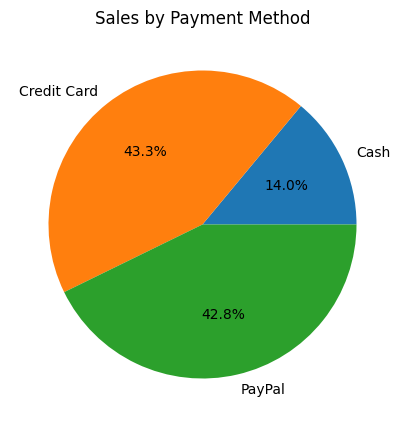

In [27]:
plt.figure(figsize=(5,5))
financial.groupby('Payment Method')['Total Sales'].sum().plot(kind='pie', autopct='%1.1f%%')

plt.title('Sales by Payment Method')
plt.ylabel('')
plt.show()

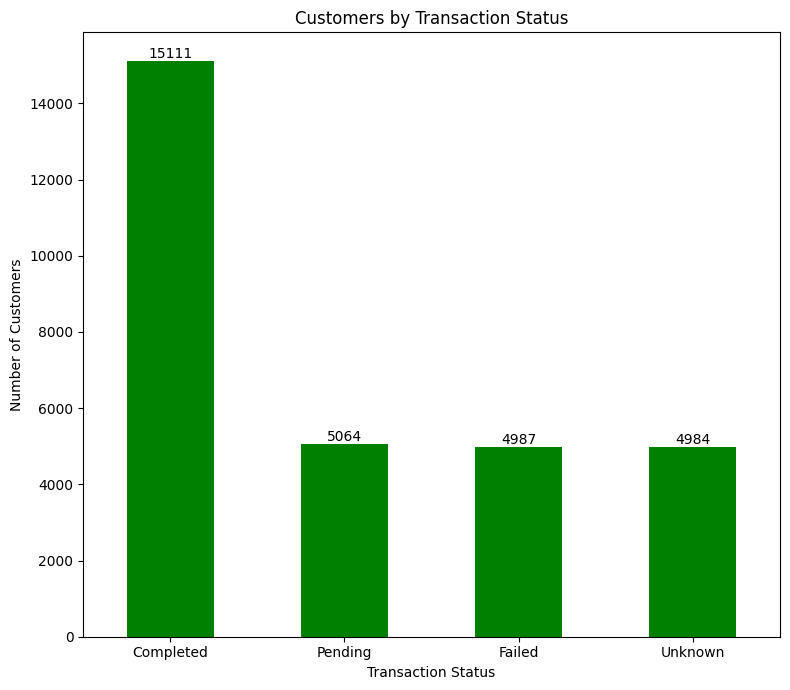

In [28]:
status_counts = financial['Transaction Status'].value_counts()

ax = status_counts.plot(kind='bar', color='green', figsize=(8,7))
plt.title('Customers by Transaction Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

for i, v in enumerate(status_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

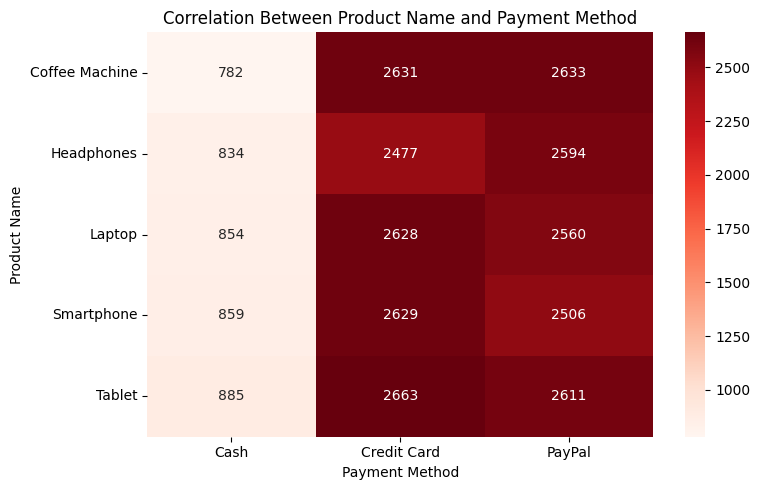

In [29]:
corr_table = pd.crosstab(financial['Product Name'], financial['Payment Method'])

plt.figure(figsize=(8,5))
sns.heatmap(corr_table, annot=True, fmt='d', cmap='Reds')

plt.title('Correlation Between Product Name and Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

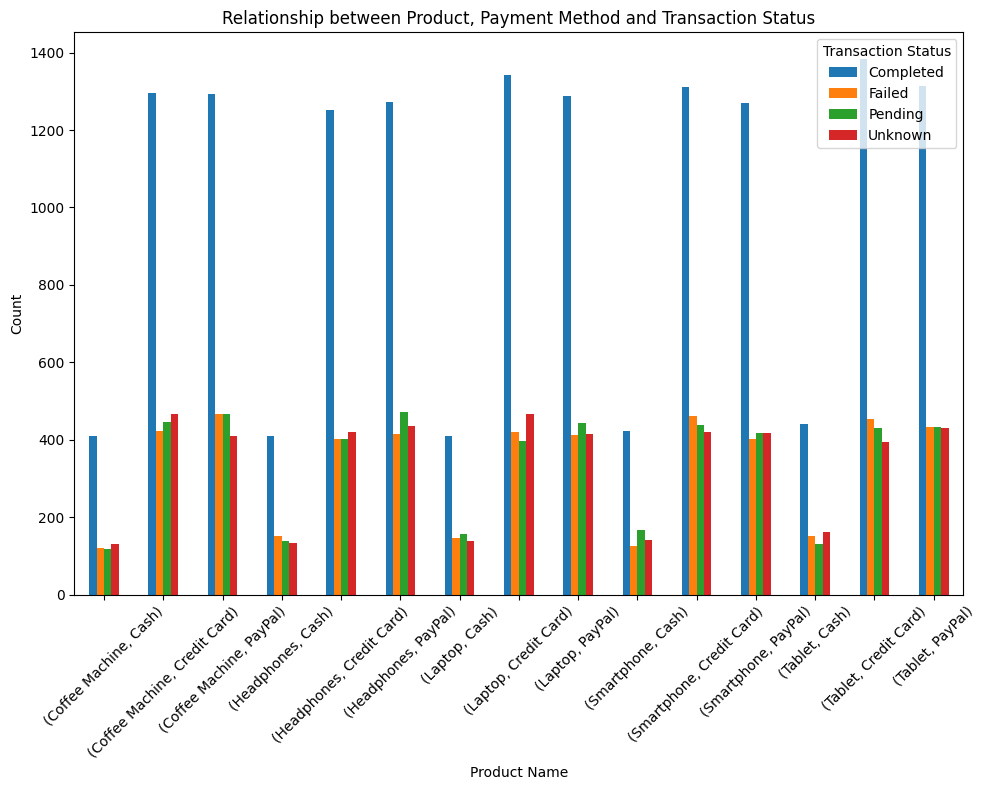

In [30]:
grouped = financial.groupby(['Product Name', 'Payment Method', 'Transaction Status']).size().unstack(fill_value=0)

plt.figure(figsize=(10,8))
grouped.plot(kind='bar', figsize=(10,8))

plt.title('Relationship between Product, Payment Method and Transaction Status')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.legend(title='Transaction Status')
plt.tight_layout()
plt.show()

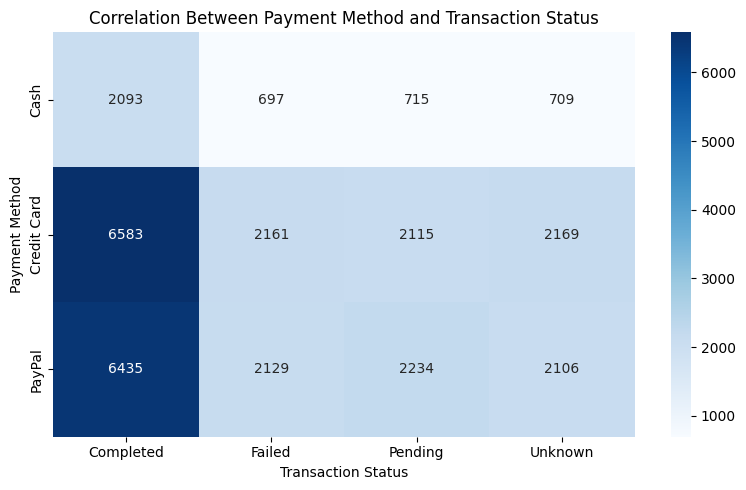

In [31]:
relation = pd.crosstab(financial['Payment Method'], financial['Transaction Status'])

plt.figure(figsize=(8,5))
sns.heatmap(relation, annot=True, fmt="d", cmap="Blues")
plt.title("Correlation Between Payment Method and Transaction Status")
plt.xlabel("Transaction Status")
plt.ylabel("Payment Method")
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

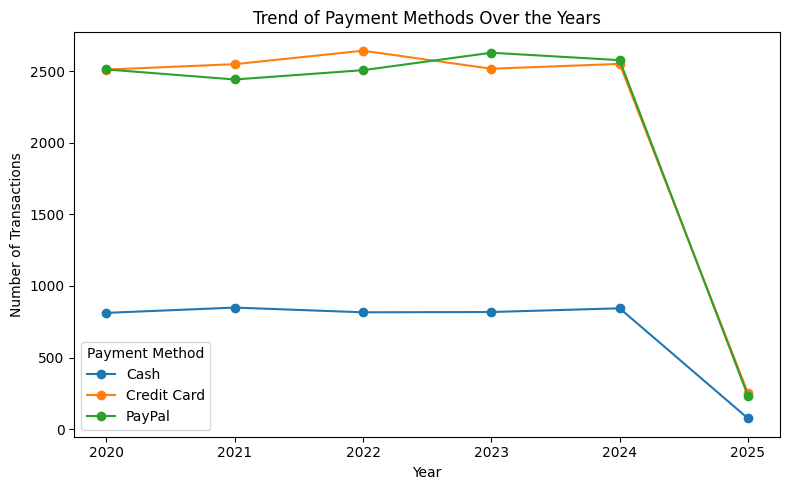

In [32]:
pm_year = financial.groupby(['Year', 'Payment Method']).size().unstack(fill_value=0)


plt.figure(figsize=(8,5))
pm_year.plot(kind='line', marker='o', figsize=(8,5))

plt.title("Trend of Payment Methods Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Transactions")
plt.xticks(pm_year.index)
plt.legend(title="Payment Method")
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

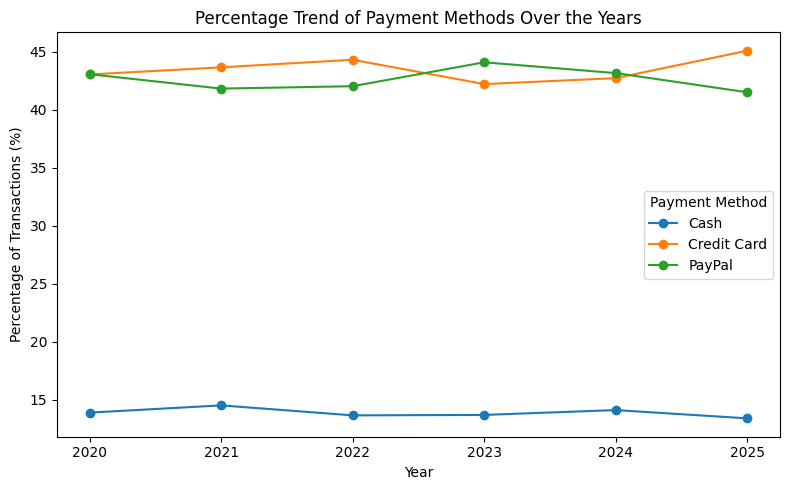

In [37]:
pm_year = financial.groupby(['Year', 'Payment Method']).size().unstack(fill_value=0)

pm_year_pct = pm_year.div(pm_year.sum(axis=1), axis=0) * 100


plt.figure(figsize=(8,5))
pm_year_pct.plot(kind='line', marker='o', figsize=(8,5))

plt.title("Percentage Trend of Payment Methods Over the Years")
plt.xlabel("Year")
plt.ylabel("Percentage of Transactions (%)")
plt.xticks(pm_year_pct.index)
plt.legend(title="Payment Method")
plt.tight_layout()
plt.show()